In [63]:
import os as os
import csv as csv
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from time import time
import pandas as pd
import numpy as np
from PIL import Image
import keras.layers.advanced_activations
import scipy
import random
import matplotlib.pyplot as plt  
from scipy.stats import norm  
import keras
from keras.models import Sequential
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D,concatenate
from keras.layers import UpSampling2D, Reshape, Lambda, Flatten, Activation
from keras.models import Model  
from keras.optimizers import SGD, Adadelta, Adagrad,Adam
from keras import backend as K  
from keras import objectives  
from keras.utils.vis_utils import plot_model  
from keras.utils import np_utils, generic_utils
import sys 
import tensorflow as tf
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers import BatchNormalization
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
%matplotlib inline
from sklearn import manifold, datasets,cluster
from sklearn.utils import check_random_state
from sklearn import metrics

In [3]:
import SimpleITK as sitk  
import cv2 

In [7]:
outpath = "Pro_image_process/qiege/"
outpath_label = "Pro_image_process/label/"
file_name = []
label_name = []
for num in range(50):
    if num<=9:
        filename = "Pro_image_process/Train/Case0" +str(num) + "_segmentation.mhd" 
        filename1 = "Pro_image_process/Train/Case0" + str(num) + ".mhd"  
    else:
        filename = "Pro_image_process/Train/Case" +str(num) + "_segmentation.mhd" 
        filename1 = "Pro_image_process/Train/Case" + str(num) + ".mhd"
    
    
    ds = sitk.ReadImage(filename)  
    img_array = sitk.GetArrayFromImage(ds)  
    frame_num, width, height = img_array.shape  

  
    index = -1  
    for img_item in img_array:  
        index = index + 1  
        cv2.imwrite("%s/%d"%(outpath_label,index)+"segmentation"+ str(num)+".png",img_item)
        label_name.append("%s/%d"%(outpath_label,index)+"segmentation"+ str(num)+".png")

    print("done!segmentation")
    
    ds = sitk.ReadImage(filename1)  
    img_array = sitk.GetArrayFromImage(ds)  
    frame_num, width, height = img_array.shape  
  
    index = -1
    for img_item in img_array:  
        index = index + 1  
        cv2.imwrite("%s/%d"%(outpath,index)+"figure"+ str(num)+".png",img_item)
        file_name.append("%s/%d"%(outpath,index)+"figure"+ str(num)+".png")

    print("done!itself")

done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segmentation
done!itself
done!segme

In [4]:
import os
(os.listdir("Pro_image_process/qiege"))

['9figure43.png',
 '14figure1.png',
 '6figure14.png',
 '50figure2.png',
 '25figure11.png',
 '13figure35.png',
 '30figure5.png',
 '4figure41.png',
 '15figure32.png',
 '32figure10.png',
 '9figure1.png',
 '6figure15.png',
 '14figure20.png',
 '12figure14.png',
 '8figure33.png',
 '15figure37.png',
 '21figure2.png',
 '16figure1.png',
 '7figure37.png',
 '17figure36.png',
 '20figure44.png',
 '6figure31.png',
 '10figure8.png',
 '11figure28.png',
 '17figure48.png',
 '40figure2.png',
 '15figure1.png',
 '18figure37.png',
 '37figure4.png',
 '22figure3.png',
 '12figure18.png',
 '2figure19.png',
 '19figure2.png',
 '4figure29.png',
 '16figure27.png',
 '18figure47.png',
 '19figure5.png',
 '6figure22.png',
 '9figure25.png',
 '12figure9.png',
 '15figure12.png',
 '4figure21.png',
 '14figure32.png',
 '1figure3.png',
 '36figure12.png',
 '19figure37.png',
 '21figure10.png',
 '18figure35.png',
 '14figure43.png',
 '8figure18.png',
 '19figure8.png',
 '17figure26.png',
 '4figure11.png',
 '3figure47.png',
 '20fig

In [5]:
os.listdir('Pro_image_process/label/')

['8segmentation8.png',
 '7segmentation48.png',
 '28segmentation4.png',
 '13segmentation19.png',
 '1segmentation24.png',
 '31segmentation3.png',
 '15segmentation17.png',
 '7segmentation49.png',
 '50segmentation2.png',
 '34segmentation8.png',
 '25segmentation11.png',
 '10segmentation48.png',
 '7segmentation2.png',
 '8segmentation28.png',
 '16segmentation39.png',
 '5segmentation33.png',
 '19segmentation45.png',
 '32segmentation2.png',
 '4segmentation10.png',
 '46segmentation9.png',
 '3segmentation47.png',
 '2segmentation17.png',
 '4segmentation38.png',
 '22segmentation12.png',
 '15segmentation18.png',
 '13segmentation40.png',
 '7segmentation15.png',
 '46segmentation2.png',
 '21segmentation4.png',
 '10segmentation22.png',
 '14segmentation10.png',
 '12segmentation22.png',
 '15segmentation4.png',
 '3segmentation8.png',
 '26segmentation8.png',
 '8segmentation44.png',
 '32segmentation7.png',
 '12segmentation20.png',
 '12segmentation33.png',
 '0segmentation20.png',
 '8segmentation0.png',
 '5seg

In [8]:
file_name

['Pro_image_process/qiege//0figure0.png',
 'Pro_image_process/qiege//1figure0.png',
 'Pro_image_process/qiege//2figure0.png',
 'Pro_image_process/qiege//3figure0.png',
 'Pro_image_process/qiege//4figure0.png',
 'Pro_image_process/qiege//5figure0.png',
 'Pro_image_process/qiege//6figure0.png',
 'Pro_image_process/qiege//7figure0.png',
 'Pro_image_process/qiege//8figure0.png',
 'Pro_image_process/qiege//9figure0.png',
 'Pro_image_process/qiege//10figure0.png',
 'Pro_image_process/qiege//11figure0.png',
 'Pro_image_process/qiege//12figure0.png',
 'Pro_image_process/qiege//13figure0.png',
 'Pro_image_process/qiege//14figure0.png',
 'Pro_image_process/qiege//15figure0.png',
 'Pro_image_process/qiege//16figure0.png',
 'Pro_image_process/qiege//17figure0.png',
 'Pro_image_process/qiege//18figure0.png',
 'Pro_image_process/qiege//19figure0.png',
 'Pro_image_process/qiege//20figure0.png',
 'Pro_image_process/qiege//21figure0.png',
 'Pro_image_process/qiege//22figure0.png',
 'Pro_image_process/q

In [9]:
label_name

['Pro_image_process/label//0segmentation0.png',
 'Pro_image_process/label//1segmentation0.png',
 'Pro_image_process/label//2segmentation0.png',
 'Pro_image_process/label//3segmentation0.png',
 'Pro_image_process/label//4segmentation0.png',
 'Pro_image_process/label//5segmentation0.png',
 'Pro_image_process/label//6segmentation0.png',
 'Pro_image_process/label//7segmentation0.png',
 'Pro_image_process/label//8segmentation0.png',
 'Pro_image_process/label//9segmentation0.png',
 'Pro_image_process/label//10segmentation0.png',
 'Pro_image_process/label//11segmentation0.png',
 'Pro_image_process/label//12segmentation0.png',
 'Pro_image_process/label//13segmentation0.png',
 'Pro_image_process/label//14segmentation0.png',
 'Pro_image_process/label//15segmentation0.png',
 'Pro_image_process/label//16segmentation0.png',
 'Pro_image_process/label//17segmentation0.png',
 'Pro_image_process/label//18segmentation0.png',
 'Pro_image_process/label//19segmentation0.png',
 'Pro_image_process/label//20s

In [56]:
count_512 = 0
count_320 = 0
count_256_384 = 0
for i in range(len(file_name)):
    ds = sitk.ReadImage(file_name[i]) 
    img_array = sitk.GetArrayFromImage(ds)
    if img_array.shape==(512,512):
        #print(img_array.shape)
        count_512+=1
    else:
        if img_array.shape==(320,320):
            #print(img_array.shape)
            count_320+=1
        else:
            #print(img_array.shape)
            count_256_384+=1
print(count_512,count_320,count_256_384)

760 548 69


In [10]:
img_array.shape[0]

24

In [11]:
len(file_name)

1377

In [12]:
print(count_512+count_320+count_256_384)

NameError: name 'count_512' is not defined

In [13]:
original_train_data = np.zeros((1377,512,512))
original_label = np.zeros((1377,512,512))
for i in range(len(file_name)):
    ds = sitk.ReadImage(file_name[i]) 
    img_array = sitk.GetArrayFromImage(ds)
    #(512 - img_array.shape[0])/2
    original_train_data[i,int((512 - img_array.shape[0])/2):int((512 - img_array.shape[0])/2+img_array.shape[0]),int((512 - img_array.shape[0])/2):int((512 - img_array.shape[0])/2+img_array.shape[0])] = img_array
    ds = sitk.ReadImage(label_name[i])
    img_array = sitk.GetArrayFromImage(ds)
    original_label[i,int((512 - img_array.shape[0])/2):int((512 - img_array.shape[0])/2+img_array.shape[0]),int((512 - img_array.shape[0])/2):int((512 - img_array.shape[0])/2+img_array.shape[0])] = img_array
    
    

In [14]:
original_label.shape

(1377, 512, 512)

In [15]:
original_train_data.shape

(1377, 512, 512)

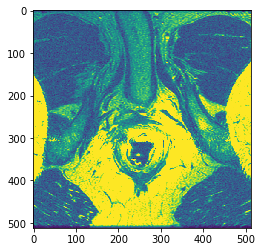

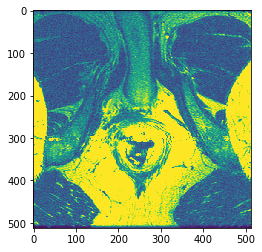

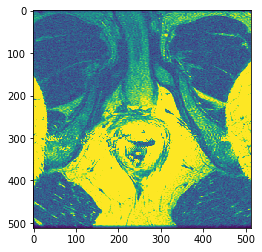

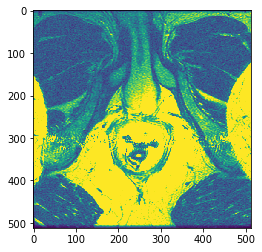

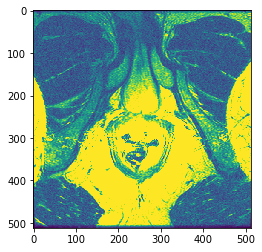

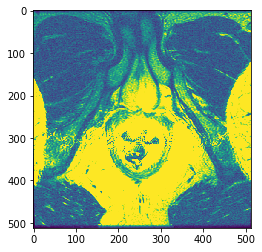

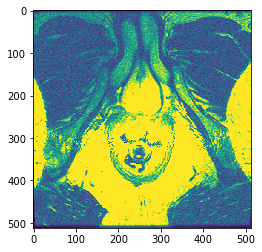

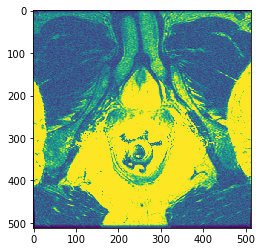

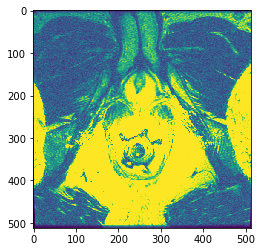

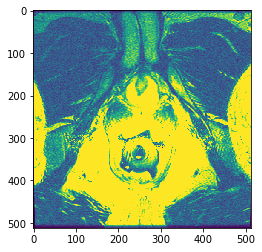

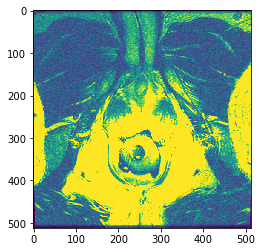

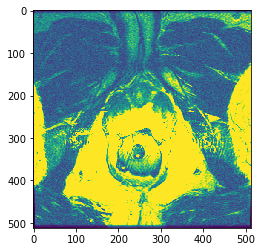

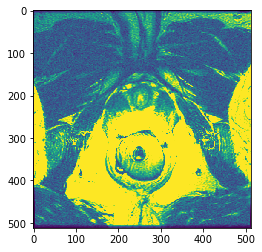

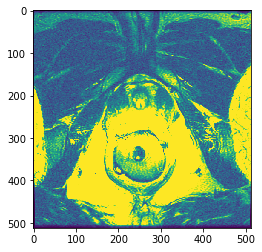

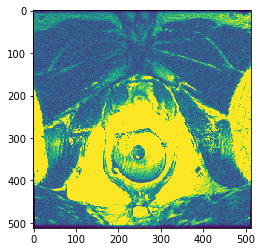

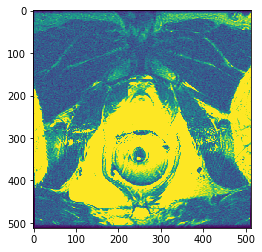

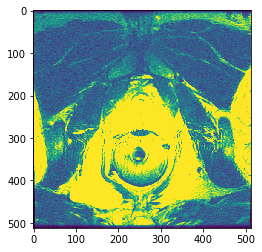

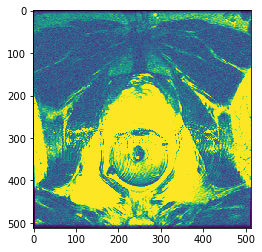

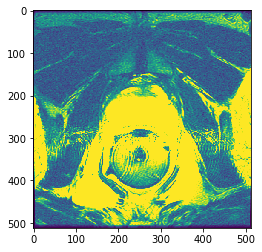

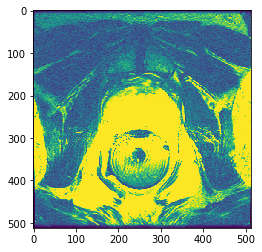

In [16]:
for i in range(20):
    plt.imshow(original_train_data[i])
    plt.show()

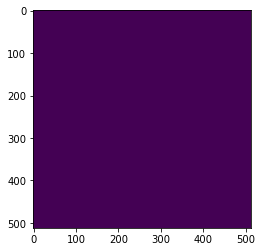

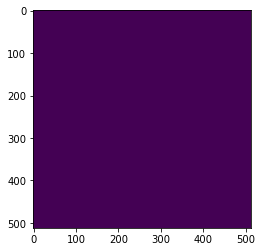

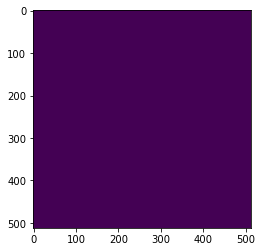

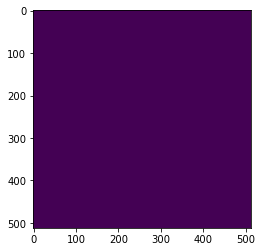

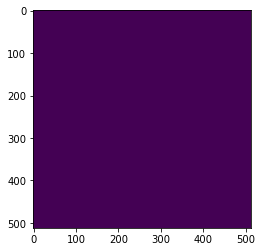

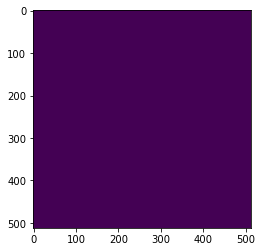

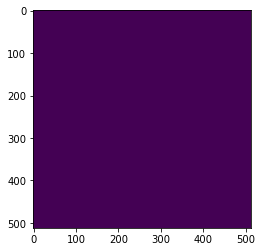

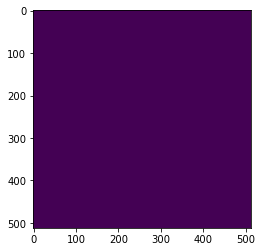

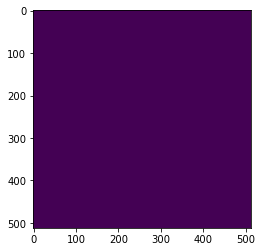

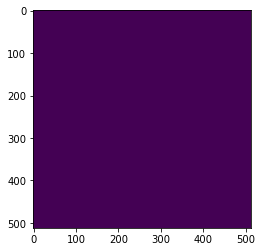

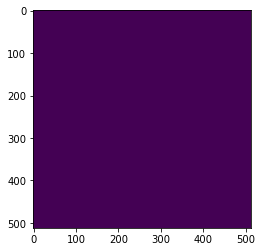

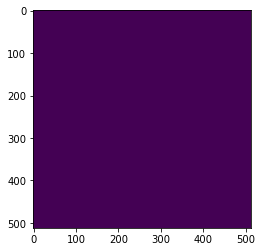

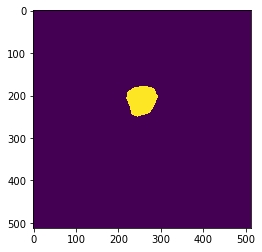

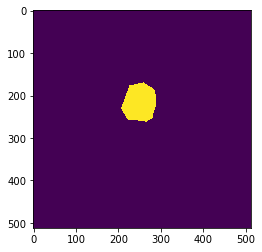

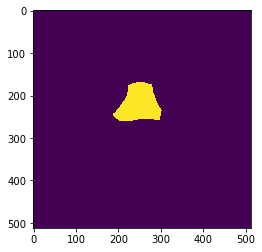

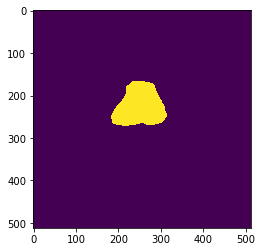

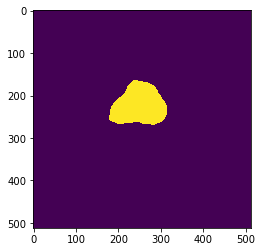

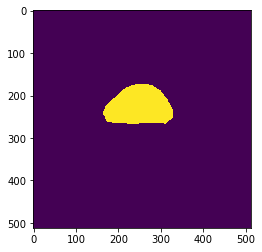

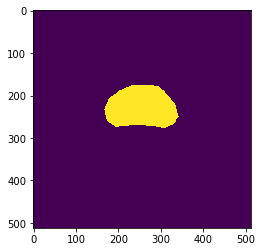

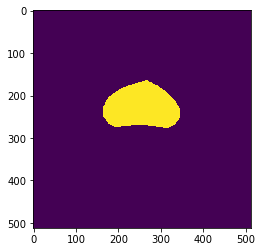

In [17]:
for i in range(20):
    plt.imshow(original_label[i])
    plt.show()

In [18]:
np.mean(original_train_data)

125.61962107462388

In [19]:
np.max(original_train_data)

255.0

In [20]:
np.min(original_train_data)

0.0

In [21]:
normalized_data = original_train_data/255

In [39]:
normalized_data = np.reshape(normalized_data,(-1,512,512,1))
original_label = np.reshape(original_label,(-1,512,512,1))

In [23]:
normalized_data.shape

(1377, 512, 512, 1)

In [77]:
np.savetxt("normalized_data",normalized_data[:,:,:,0].reshape(-1,512*512))
np.savetxt("original_label",original_label[:,:,:,0].reshape(-1,512*512))

In [78]:
normalized_data[:,:,:,0].shape

(1377, 512, 512)

In [79]:
aa = np.loadtxt("normalized_data.txt")

In [81]:
aa.shape

(1377, 262144)

In [64]:
batch_size =1
latent_dim = 80
nb_epoch = 50   
intermediate_dim_1 = 10
#intermediate_dim_2 = 300

input_img = Input(shape=(512,512,1))

conv_1 = Conv2D(8, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(input_img)
maxpool_1 = MaxPooling2D((2, 2),  padding='same')(conv_1)

conv_2 = Conv2D(8, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(maxpool_1)
maxpool_2 = MaxPooling2D((2, 2),  padding='same')(conv_2)

conv_3 = Conv2D(8, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(maxpool_2)
maxpool_3 = MaxPooling2D((2, 2),  padding='same')(conv_3)

conv_4 = Conv2D(8, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(maxpool_3)
maxpool_4 = MaxPooling2D((2, 2),  padding='same')(conv_4)

conv_5 = Conv2D(8, (3, 3), activation='tanh', padding='same',kernel_initializer='normal')(maxpool_4)
maxpool_5 = MaxPooling2D((2, 2),  padding='same')(conv_5)

#x = Conv2D(5, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
#x = MaxPooling2D((2, 2),  padding='same')(x)

visual = Flatten()(maxpool_5)
h_1 = Dense(intermediate_dim_1, activation='relu')(visual)
h_4 = Dense(intermediate_dim_1,activation='tanh')(h_1)
h_5 = Dense(8*16*16,activation='relu')(h_4)
h_6 = Reshape((16,16,8))(h_5)


conv_6 = Conv2D(8, (3, 3), activation='tanh', padding='same',kernel_initializer='normal')(h_6)
upsample_6 = UpSampling2D((2, 2))(conv_6)

conv_7 = Conv2D(8, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(upsample_6)
upsample_7 = UpSampling2D((2, 2))(conv_7)

conv_8 = Conv2D(8, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(upsample_7)
upsample_8 = UpSampling2D((2, 2))(conv_8)

conv_9 = Conv2D(8, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(upsample_8)
upsample_9 = UpSampling2D((2, 2))(conv_9)

conv_10 = Conv2D(8,  (3, 3), activation='tanh',padding='same',kernel_initializer='normal')(upsample_9)
upsample_10 = UpSampling2D((2, 2))(conv_10)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(upsample_10)

EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')


def vae_loss(x, decoded):  
    xent_loss = K.sum(K.sum(objectives.binary_crossentropy(x ,decoded),axis=-1),axis=-1)
    return xent_loss 


vae = Model(inputs=input_img, outputs=decoded)
vae.compile(optimizer='rmsprop', loss=vae_loss)

In [65]:
vae.fit(normalized_data[:1300], original_label[:1300],
        shuffle=True,
        epochs=100,
        batch_size=batch_size,
        validation_data=(normalized_data[1300:1350], original_label[1300:1350]),callbacks=[EarlyStopping])

Train on 1300 samples, validate on 50 samples
Epoch 1/100


ResourceExhaustedError: OOM when allocating tensor with shape[1,8,512,512]
	 [[Node: conv2d_122/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](_arg_input_14_0_2/_203, conv2d_122/kernel/read)]]
	 [[Node: loss_13/mul/_239 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_1748_loss_13/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'conv2d_122/convolution', defined at:
  File "/home/sunhao/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/sunhao/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-64-b3f89ffeb06b>", line 9, in <module>
    conv_1 = Conv2D(8, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(input_img)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/keras/engine/topology.py", line 602, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/keras/layers/convolutional.py", line 164, in call
    dilation_rate=self.dilation_rate)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 3164, in conv2d
    data_format='NHWC')
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 672, in convolution
    op=op)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 338, in with_space_to_batch
    return op(input, num_spatial_dims, padding)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 664, in op
    name=name)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 131, in _non_atrous_convolution
    name=name)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 397, in conv2d
    data_format=data_format, name=name)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[1,8,512,512]
	 [[Node: conv2d_122/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](_arg_input_14_0_2/_203, conv2d_122/kernel/read)]]
	 [[Node: loss_13/mul/_239 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_1748_loss_13/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [48]:
batch_size =100
latent_dim = 30
nb_epoch = 50
intermediate_dim =512
original_dim = 64*64
LRelu = keras.layers.advanced_activations.LeakyReLU(alpha=0.3)

USE = 'autoencoder'
#USE = 'vae'
#encoder:

input_img = Input(shape=(512,512,1))

conv_1 = Conv2D(40, (3, 3), padding='same',kernel_initializer='normal')(input_img)
conv_1 = Activation(LRelu)(conv_1)
conv_1 = BatchNormalization()(conv_1)
maxpool_1 = MaxPooling2D((2, 2),padding='same')(conv_1)

conv_2 = Conv2D(40, (3, 3), padding='same',kernel_initializer='normal')(maxpool_1)
conv_2 = Activation(LRelu)(conv_2)
conv_2 = BatchNormalization()(conv_2)
maxpool_2 = MaxPooling2D((2, 2),  padding='same')(conv_2)

conv_3 = Conv2D(20, (3, 3),padding='same',kernel_initializer='normal')(maxpool_2)
conv_3 = Activation(LRelu)(conv_3)
conv_3 = BatchNormalization()(conv_3)
maxpool_3 = MaxPooling2D((2, 2),  padding='same')(conv_3)

conv_4 = Conv2D(20, (3, 3),padding='same',kernel_initializer='normal')(maxpool_3)
conv_4 = Activation(LRelu)(conv_4)
conv_4 = BatchNormalization()(conv_4)
maxpool_4 = MaxPooling2D((2, 2),  padding='same')(conv_4)

#conv_5 = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(maxpool_4)
#maxpool_5 = MaxPooling2D((2, 2),  padding='same')(conv_5)


#x = Conv2D(5, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
#x = MaxPooling2D((2, 2),  padding='same')(x)

visual = Flatten()(maxpool_4)
h_1 = Dense(intermediate_dim, activation='relu')(visual)#relu?
encoded = Dense(latent_dim, activation='tanh')(h_1)# relu?


if USE == 'autoencoder':
    h_3 = Dense(intermediate_dim,activation=LRelu)(encoded)#for AE
    
    
h_4 = Dense(20*32*32,activation=LRelu)(h_3)
h_5 = Reshape((32,32,20))(h_4)


#conv_6 = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(h_5)
#upsample_6 = UpSampling2D((2, 2))(conv_6)

#conv_7 = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(h_5)
upsample_7 = UpSampling2D((2, 2))(h_5)

conv_8 = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(upsample_7)
upsample_8 = UpSampling2D((2, 2))(conv_8)

conv_9 = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(upsample_8)
upsample_9 = UpSampling2D((2, 2))(conv_9)

conv_10 = Conv2D(80,  (3, 3), activation='relu',padding='same',kernel_initializer='normal')(upsample_9)
upsample_10 = UpSampling2D((2, 2))(conv_10)

decoded = Conv2D(1, (3, 3), activation='tanh', padding='same')(upsample_10)


EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')


#def vae_loss(x, decoded):  
#    xent_loss = K.sum(K.sum(objectives.binary_crossentropy(x ,decoded),axis=-1),axis=-1)
#    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1) 
#    return xent_loss + 1*kl_loss  

def ae_loss(x, decoded):  
    xent_loss = original_dim * objectives.mean_squared_error(x,decoded)
    return xent_loss

if USE == 'autoencoder':
    autoencoder = Model(inputs=input_img, outputs=decoded)
    autoencoder.compile(optimizer='rmsprop', loss=ae_loss)

/home/sunhao/anaconda3/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [49]:
autoencoder.fit(normalized_data[:1300], original_label[:1300],
        shuffle=True,
        epochs=100,
        batch_size=batch_size,
        validation_split = 0.1,callbacks=[EarlyStopping])

Train on 1170 samples, validate on 130 samples
Epoch 1/100


ResourceExhaustedError: OOM when allocating tensor of shape [512,20480] and type float
	 [[Node: training_7/RMSprop/Const_22 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [512,20480] values: [0 0 0]...>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'training_7/RMSprop/Const_22', defined at:
  File "/home/sunhao/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/sunhao/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2808, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-49-074784fd5a90>", line 5, in <module>
    validation_split = 0.1,callbacks=[EarlyStopping])
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/keras/engine/training.py", line 1575, in fit
    self._make_train_function()
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/keras/engine/training.py", line 960, in _make_train_function
    loss=self.total_loss)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 87, in wrapper
    return func(*args, **kwargs)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/keras/optimizers.py", line 226, in get_updates
    accumulators = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/keras/optimizers.py", line 226, in <listcomp>
    accumulators = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 625, in zeros
    return variable(tf.constant_initializer(0., dtype=tf_dtype)(shape),
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py", line 203, in __call__
    verify_shape=verify_shape)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/constant_op.py", line 106, in constant
    attrs={"value": tensor_value, "dtype": dtype_value}, name=name).outputs[0]
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/sunhao/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor of shape [512,20480] and type float
	 [[Node: training_7/RMSprop/Const_22 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [512,20480] values: [0 0 0]...>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
